In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib

In [7]:
df = pd.read_csv("CarPricePrediction.csv")

print(df.head())
print(df.info())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                NaN  alfa-romero       gas        std   
1          3                NaN  alfa-romero       gas        std   
2          1                NaN  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

In [9]:
print(df.isnull().sum())

df = df.dropna()

print("Duplicates:", df.duplicated().sum())

df = df.drop_duplicates()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64
Duplicates: 0


In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [17]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_features": ["auto", "sqrt", 0.5],
    "min_samples_split": [2, 5, 10],
    "bootstrap": [True, False],
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
31 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\base.py", line 469, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\PC\anaconda3\Lib\site-packages\sklearn\utils\

In [21]:
best_params = grid_search.best_params_

rf_best = RandomForestRegressor(
    **best_params, random_state=42,
    oob_score=best_params.get("bootstrap", False)
)

rf_best.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [23]:
y_pred = rf_best.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 1300.7613888888886
MSE: 3231230.2134950813
RMSE: 1797.5622975282613


In [25]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("Random Forest RMSE:", rmse)

Decision Tree RMSE: 2447.232846332091
Random Forest RMSE: 1797.5622975282613


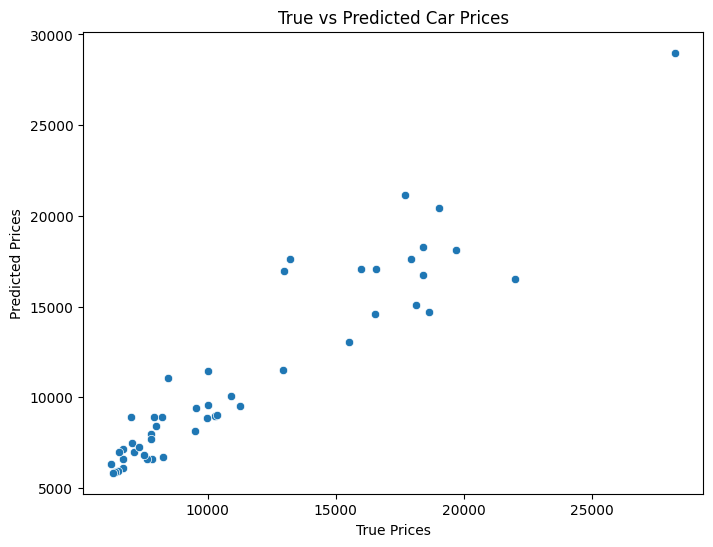

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted Car Prices")
plt.show()

In [29]:
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X, y)

joblib.dump(final_model, "car_price_rf_model.joblib")
joblib.dump(df_encoded.columns, "model_features.joblib")

['model_features.joblib']

In [31]:
new_data = pd.DataFrame({
    'symboling': [1, 2],
    'normalized-losses': [95, 84],
    'make': ['toyota', 'honda'],
    'fuel-type': ['gas', 'gas'],
    'aspiration': ['std', 'std'],
    'num-of-doors': ['four', 'four'],
    'body-style': ['sedan', 'hatchback'],
    'drive-wheels': ['fwd', 'fwd'],
    'engine-location': ['front', 'front'],
    'wheel-base': [98.0, 96.5],
    'length': [176.2, 167.0],
    'width': [66.5, 65.4],
    'height': [54.3, 52.6],
    'curb-weight': [2579, 2204],
    'engine-type': ['ohc', 'ohc'],
    'num-of-cylinders': ['four', 'four'],
    'engine-size': [108, 97],
    'fuel-system': ['mpfi', '2bbl'],
    'bore': [3.50, 3.19],
    'stroke': [2.80, 3.03],
    'compression-ratio': [8.8, 9.6],
    'horsepower': [75, 76],
    'peak-rpm': [5000, 6000],
    'city-mpg': [30, 30],
    'highway-mpg': [38, 34]
})

new_data_encoded = pd.get_dummies(new_data, drop_first=True)

new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

loaded_model = joblib.load("car_price_rf_model.joblib")
predictions = loaded_model.predict(new_data_encoded)

print("Predicted Prices:", predictions)

Predicted Prices: [10945.535       8800.62666667]
